# Utilisation des filtres pour prédire la couleur de pixels 

In [149]:
#############################
# METTRE LES FONCTIONS SUR UN DOCUMENT À PART 
#CREER UNE FONCTION POUR ENLEVER UN PIXEL / UNE PARTIE
#############################

## Downsampling 

#### A) Pour un seul pixel

Le Downsampling est une méthode qui consiste à réduit la taille de l'image ainsi que sa résolution.
On veut donc d'abord appliquer une filtre blur (blur gaussian) à notre image. Ensuite, on la redimensionne en une taille plus petite, avant de la re aggrandir en utilisant un bilineair interpolation. 

L'idée est que si on réduit la résolution de l’image (downsampling), le pixel manquant sera fusionné avec ses voisins, ce qui permet de diluer son absence. Ensuite, si on remonte la résolution (upsampling), on peut interpoler et obtenir une valeur plausible à l’endroit du pixel manquant.

On télécharge une image d'une déjà mauvaise résolution (pour qu'elle ne soit pas trop lourde). 

In [150]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt  
import os
from Filtres_from_scratch import * 

La taille de l'image est: (266, 190)


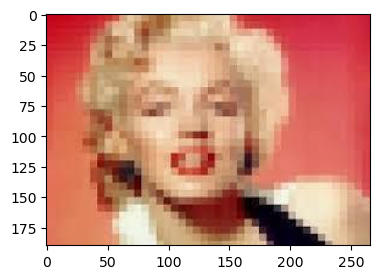

In [151]:
#Importation d'une image 
path = '/Users/amandine/Desktop/Perso/Education/Code/Projets perso - Info/Python_CUPGE1/Projet_fin_semestre/pixels.jpg'

plt.figure(figsize = (5, 3))
#On vérifit si le chemin existe
if os.path.exists(path):
    img = Image.open(path)
    print('La taille de l\'image est:', img.size)
    plt.imshow(img)
    
else :
    print('Chemin introuvable')

img1 = img.copy()
img2 = img.copy()
imgfft = img.copy()
img_noy = img.copy()

On transforme notre image en numpy array, plus simple à manipuler. On détermine aléatoirement les coordonnées du pixels que nous allons retirer. Nous le remplaçons par un pixel vert (0, 255, 0). 

Pour pouvoir modifier l'image de base, on doit créer une copie de la liste *img_Data*

In [152]:
img_Data = np.asarray(img)
h, w, _ = image.shape

    #On retire un pixel: 
h_pos = np.random.randint(h)
w_pos = np.random.randint(w)

    #Poisition du pixel retiré
hole_position = (h_pos, w_pos)

print('La valeur du pixel retiré est:', image[hole_position])
print('Les coordonnées du pixel retiré sont:', hole_position)

    #On fait une copie de la liste pour pouvoir la modifier
image_modifiee = image.copy()

    #On met un pixel vert
image_modifiee[hole_position] = [0, 255, 0]

img_with_hole = Image.fromarray(image_modifiee)


La valeur du pixel retiré est: [232 207 164]
Les coordonnées du pixel retiré sont: (15, 106)


In [153]:
#On applique un flou
blurred_img = img_with_hole.filter(ImageFilter.GaussianBlur(radius = 5))

Ici nous redimensionnons l'image en la divisant par 4. Pour cela on utilise une interpolation bilinéaire. L'interpolation bilinéaire est une méthode d'interpolation pour les fonctions de deux variables sur une grille régulière. Elle permet de calculer la valeur d'une fonction en un point quelconque, à partir de ses deux plus proches voisins dans chaque direction. L'interpolation est nécéssaire lorsque les coordonnées d'un pixel ne sont pas des entiers. 

In [154]:
h, w, _ = img_Data.shape
downsampled = blurred_img.resize((w//4, h//4), resample=Image.BILINEAR)

Maintenant, nous re augmentons la taille de l'image en faisant un upsampling. 

In [155]:
upsampled = downsampled.resize((w, h), resample=Image.BILINEAR)

In [156]:
upsampled_pixels = np.array(upsampled)
estimated_value = upsampled_pixels[hole_position]

print("Valeur estimée du pixel manquant :", estimated_value)

img_estimated = img_Data.copy()
img_estimated[hole_position] = estimated_value

Valeur estimée du pixel manquant : [215 182 141]


Affichons maintenant chaque étape du procéssus et comparons la vraie valeur de la valeur prédite. 

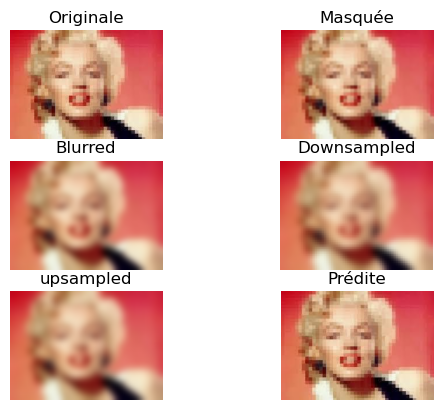

In [157]:
fig, axes = plt.subplots(3, 2)

axes[0, 0].imshow(img_Data)
axes[0,0].set_title('Originale')
axes[0,0].axis('off')

axes[0, 1].imshow(img_with_hole)
axes[0, 1].set_title('Masquée')
axes[0, 1].axis('off')

axes[1, 0].imshow(blurred_img)
axes[1, 0].set_title('Blurred')
axes[1, 0].axis('off')

axes[1, 1].imshow(downsampled)
axes[1, 1].set_title('Downsampled')
axes[1, 1].axis('off')

axes[2, 0].imshow(upsampled)
axes[2, 0].set_title('upsampled')
axes[2, 0].axis('off')

axes[2, 1].imshow(img_estimated)
axes[2, 1].set_title('Prédite')
axes[2, 1].axis('off')

plt.show()

In [158]:
#Comparaison des résultats
print('Valeur d\'origine : ', img_Data[hole_position])
print('Valeur estimée :   ', estimated_value)

Valeur d'origine :  [233 210 166]
Valeur estimée :    [215 182 141]


On veut alors calculer l'erreur du modèle par rapport au véritable pixel. Pour cela nous pouvons utiliser plusieurs calculs d'erreur: l'erreur absolue moyenne, l'erreur quadratique moyenne et la racine carré de l'erreur quadratique moyenne.

In [159]:
#Erreur absolue moyenne 
mae = np.mean(np.abs(img_Data[hole_position].astype(int) - estimated_value.astype(int)))
print('la mae vaut:', mae)

#Erreur quadratique moyenne
mse = np.mean((img_Data[hole_position].astype(int) - estimated_value.astype(int))**2)
print('la mse vaut:', mse)

#Racine carrée de l'erreur quadratique moyenne
rmse = np.sqrt(mse)
print('la rmse vaut: ',rmse)


la mae vaut: 23.666666666666668
la mse vaut: 577.6666666666666
la rmse vaut:  24.03469714114714


In [160]:
def erreur_moyenne(image, image2, mask = (0, 255, 0)): 
    width, height = image.size
    total_error = 0
    count = 0 
    for x in range(width):
        for y in range(height):
            if image.getpixel((x, y)) == mask: 
                r, g, b = image[(x, y)]
                r1, g1, b1 = image2[(x, y)]
                total_error += abs(r - r1) + abs(g - g1) + abs(b - b1)
                count += 1
    return total_error/(count*3) if count > 0 else 0

#erreur_moyenne(img_with_hole, img_estimated)

#### B) Pour une partie de l'image 

Regardons de plus près dans quelle mesure le downsampling fonctionne lorsque des carrés de pixels manquent.

In [161]:
square_size = 5

In [162]:
def enlever_pixels(image, num_pixels):
    height, width, _ = image.shape 

    #On choisit aleatoirement les coordonnées des pixel sà surpprimer
    x_random = np.random.randint(square_size//2, width - square_size//2, num_pixels)
    y_random = np.random.randint(square_size//2, height - square_size//2, num_pixels)


    #Transformer en noir tous les pixels choisit aléatoirement 
    for x, y in zip(x_random, y_random):
        for j in range(-square_size//2, square_size//2):
            for i in range(-square_size//2, square_size//2):
                image[(y+j, x+i)] = [0, 255, 0]
                print((x+i, y+j))
    return image, x_random, y_random
  


In [163]:
img_Data_pixels = img_Data.copy()

h, w, _ = img_Data_pixels.shape

img_with_square_modify, x_R, y_R = enlever_pixels(img_Data_pixels, 1)

img_with_square = Image.fromarray(img_with_square_modify)


(7, 78)
(8, 78)
(9, 78)
(10, 78)
(11, 78)
(7, 79)
(8, 79)
(9, 79)
(10, 79)
(11, 79)
(7, 80)
(8, 80)
(9, 80)
(10, 80)
(11, 80)
(7, 81)
(8, 81)
(9, 81)
(10, 81)
(11, 81)
(7, 82)
(8, 82)
(9, 82)
(10, 82)
(11, 82)


In [164]:
blurred_img_square = img_with_square.filter(ImageFilter.GaussianBlur(radius = 5))

In [165]:
downsampled_square = blurred_img_square.resize((w//4, h//4), resample=Image.BILINEAR)

In [166]:
upsampled_square = downsampled_square.resize((w, h), resample=Image.BILINEAR)

In [167]:
upsampled_pixels_square = np.array(upsampled_square)

img_estimee_square = img_Data.copy()

def estimation(image):
    for j in range(square_size):
            for i in range(square_size):
                estimated_value_square = image[(y_R+j, x_R+i)]
                print(f'Le pixel a la position {(int(x_R+i), int(y_R+j))} a une valeur de {estimated_value_square}')
                img_estimee_square[(y_R+j, x_R+i,)] = estimated_value_square
    return img_estimee_square



In [168]:
#Comparaison des estimated values: 

print('Vraies valeurs des pixels: ')
vraie_img = estimation(img_Data)

print('Estimations des valeurs des pixels: ')
est_squ = estimation(upsampled_pixels_square)


Vraies valeurs des pixels: 
Le pixel a la position (10, 81) a une valeur de [[225 100  78]]
Le pixel a la position (11, 81) a une valeur de [[226 101  79]]
Le pixel a la position (12, 81) a une valeur de [[224 102  79]]
Le pixel a la position (13, 81) a une valeur de [[225 103  80]]
Le pixel a la position (14, 81) a une valeur de [[225 103  79]]
Le pixel a la position (10, 82) a une valeur de [[225 100  78]]
Le pixel a la position (11, 82) a une valeur de [[226 101  79]]
Le pixel a la position (12, 82) a une valeur de [[224 102  79]]
Le pixel a la position (13, 82) a une valeur de [[225 103  79]]
Le pixel a la position (14, 82) a une valeur de [[224 104  79]]
Le pixel a la position (10, 83) a une valeur de [[225 100  78]]
Le pixel a la position (11, 83) a une valeur de [[224 102  79]]
Le pixel a la position (12, 83) a une valeur de [[224 102  78]]
Le pixel a la position (13, 83) a une valeur de [[225 103  79]]
Le pixel a la position (14, 83) a une valeur de [[224 104  79]]
Le pixel a l

/var/folders/4y/tytpgp396q94l9j_r7qwzqq00000gn/T/ipykernel_92298/3175497507.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Le pixel a la position {(int(x_R+i), int(y_R+j))} a une valeur de {estimated_value_square}')


In [169]:
def visualisation_image(image, masquée, prediction): 
    fig, axes = plt.subplots(1, 3)

    axes[0].imshow(image)
    axes[0].set_title('Originale')
    axes[0].axis('off')

    axes[1].imshow(masquée)
    axes[1].set_title('Masquée')
    axes[1].axis('off')

    axes[2].imshow(prediction)
    axes[2].set_title('Prédite')
    axes[2].axis('off')

    plt.show()

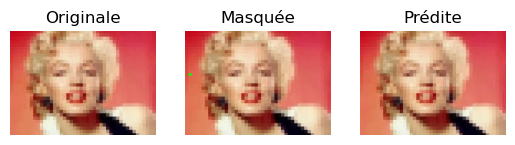

In [170]:
visualisation_image(img_Data, img_with_square, est_squ )

In [171]:
#def visualisation_carré():

In [172]:
#Calcul de l'érreur moyenne pour la valeur de chaque pixels MSE 

### Noyaux de convolutions

In [173]:
Img_noy = np.asarray(img_noy)

Img_noy_masquee = 

SyntaxError: invalid syntax (1951378467.py, line 3)

Un noyau (ou filtre) de convolution est une petite matrice carrée qu’on applique sur chaque pixel d’une image pour le transformer en fonction de ses voisins. On centre le noyau sur un pixel, on multiplie chaque coefficient du noyau par la valeur du pixel à cette position, et on somme le tout, qui devient ensuite la nouvelle valeur du pixel central.

In [ ]:

def appliquer_noyau_conv(image):
    image = image.copy()
    height, width, _ = image.shape
    pixel_manquant = [0, 255, 0]  # Vert fluo

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if np.array_equal(image[y, x], pixel_manquant):
                voisins = []
                for dy in [-1, 0, 1]:
                    for dx in [-1, 0, 1]:
                        ny, nx = y + dy, x + dx
                        if (dy != 0 or dx != 0):  # ne pas prendre le pixel central
                            val = image[ny, nx]
                            if not np.array_equal(val, pixel_manquant):
                                voisins.append(val)

                if voisins:
                    moyenne = np.mean(voisins, axis=0)
                    image[y, x] = moyenne.astype(np.uint8)

    return image

In [ ]:
print(img_noy.size)

(266, 190)


In [ ]:
predite = appliquer_noyau_conv(Img_noy)

#plt.imshow(predite)

In [ ]:
img_with_mask, x_Ra, y_Ra = enlever_pixels(img_Data_pixels, 1)

(131, 50)
(132, 50)
(133, 50)
(131, 51)
(132, 51)
(133, 51)
(131, 52)
(132, 52)
(133, 52)


## Appliquer un filtrage frequentiel 

Cette apporhce consiste à attribuer à chaque motifs d'une images une composante de fréquence. Ainsi, une imag est constituée de hautes et de basses fréquences. Les basses fréquences représentent tous les motifs qui sont plutôt lent et uniforme (un fond de même couleur), et les hautes fréquences, tous les détails, les bords avec des changements brusques. 

Pour transformer une image en fréquences, on utilise les transformées de Fourier discrète. 

Les étapes à suivre sont les suivantes: 
1. Appliquer une transformée de Fourier àl'image pour obtenir les fréquences.
2. Appliquer un filtre passe-bas ou passe-haut pour supprimer certaines fréquences. (réduire la qualité de l'image).
3. Appliquer une transformée de Fourier inverse afin de revenir à une image avec des valeurs de pixels. 
4. Comparer la valeur du pixel manquant avant/après.


Pour cela, nous allons utiliser le module déjà préinstallé de python, comme notamment scipy.fft pour les "fast fourier transform".
We use the following tools: 

- **fftshift** : allows swapping the lower and upper halves of a vector, so that it becomes suitable for display.
- **ifftshift** : 
- **fft2** : Permet de calculer une tranformée de fourier  une image en 2D
- **ifft2** : Permet d'obtenir la transformée de fourier inverse pour une image en 2D

In [ ]:
Imgfft = np.asarray(imgfft)

#Imgfft.astype(np.float32)

for c in range(3):
        channel = Imgfft[:, :, c]
print(channel.shape)

#Comprendre ce qu'est une image sous forme de matrice 
#Imgfft[189][265]
#première parenthèses: [x]: le numéro de la ligne 
#Deuxième parenthèses: [Y]: le numérod de la colonne


(190, 266)


array([188, 154, 119], dtype=uint8)

In [ ]:
h_pos_fft = np.random.randint(h)
w_pos_fft = np.random.randint(w)

#Poisition du pixel retiré
hole_position = (h_pos_fft, w_pos_fft)

print('La valeur du pixel retiré est:', Imgfft[hole_position])
print('Les coordonnées du pixel retiré sont:', hole_position)

#On fait une copie de la liste pour pouvoir la modifier
Imgfft_modify = Imgfft.copy()

#On met un pixel vert
Imgfft_modify[hole_position] = [0, 255, 0]

Imgfft_masquee = np.asarray(Imgfft_modify)

La valeur du pixel retiré est: [177 152 111]
Les coordonnées du pixel retiré sont: (179, 91)


In [ ]:
from scipy.fft import fft2, ifft2, ifftshift, fftshift

def T_D_F(img): 

    #On détermine la position du masque 
    mask = (img[:, :, 0] ==0) & (img[:, :, 1] == 255) & (img[:, :, 2] == 0)
    img_copy = img.copy()
    rows = 190
    cols = 266

    estimated = np.zeros_like(img)

    for c in range(3):
        #on transforme chaque pixel en fréquence 
        channel = img_copy[:, :, c]

        f =fft2(channel)
        ftshift = fftshift(f)
    
        #On créer un filtre passe-bas pour éliminer les fréquences hautes et dégrader la qualité de l'image 
        rows, cols = channel.shape

        center_rows, center_cols = rows//2, cols//2

        #On crée un cercle de rayon radius
        #On doit centrer notre cercle sur le pixel manquant 
        radius = 20
        x, y = np.ogrid[0:rows, 0:cols]
        #Equation d'une cercle centré au mileu de l'image
        mask_filter = (x-center_rows)**2 + (y-center_cols)**2 <= radius**2

        ftshift_filtered = ftshift * mask_filter
        inversed_ftshift = ifftshift(ftshift_filtered)
        inversed_f = ifft2(inversed_ftshift)
        img_back = ifft2(inversed_f).real

        estimated[:, :, c] = img_back
    y, x = np.where(mask)
    return estimated[y[0], x[0]].clip(0, 255).astype(np.uint8), x, y
    

In [ ]:
estimation, x, y = T_D_F(Imgfft_masquee)

print(estimation)

0
